In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import numpy as np

from transformers import AutoImageProcessor, AutoModelForImageClassification

In [3]:
img = Image.open('images/general_ru/239.png')

In [4]:
from transformers.models.vit.modeling_vit import ViTForImageClassification, ViTModel
from transformers.models.vit.image_processing_vit import ViTImageProcessor

In [5]:
checkpoint_vit = 'google/vit-base-patch16-224-in21k'

In [6]:
img_proc = AutoImageProcessor.from_pretrained(checkpoint_vit)
model = ViTModel.from_pretrained(checkpoint_vit)

/Users/adledovskiy/venvs/general_311/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [7]:
inputs = img_proc(img, return_tensors='pt')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


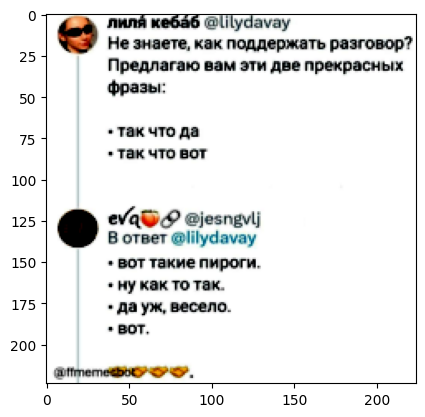

In [8]:
plt.imshow(inputs['pixel_values'].numpy()[0].transpose(1, 2, 0))

In [9]:
with torch.no_grad():
    outputs = model(**inputs)

# получение эмбеддинга
outputs[0][0, 0, :].numpy().shape

(768,)

In [10]:
from utils import get_images, Similars

In [11]:
from tqdm.notebook import tqdm

In [12]:
fns = []
embeddings_batches = []
for fns_batch, raw_batch in tqdm(get_images()):
    inputs = img_proc(raw_batch, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings_batches.append(outputs[0][:, 0, :])
    fns.extend(fns_batch)

0it [00:00, ?it/s]

In [13]:
fns = np.array(fns)

In [14]:
from os.path import join

In [15]:
path = 'images/general_ru'

In [16]:
embeddings = torch.cat(embeddings_batches)

In [17]:
similarity = F.cosine_similarity(embeddings[150], embeddings)

In [18]:
k = 5
top_k_similarities, top_k_indices = torch.topk(similarity, k=k)
top_k_indices = top_k_indices.numpy()

In [19]:
top_k_indices[0]

150

In [20]:
similars = Similars(embeddings=embeddings)

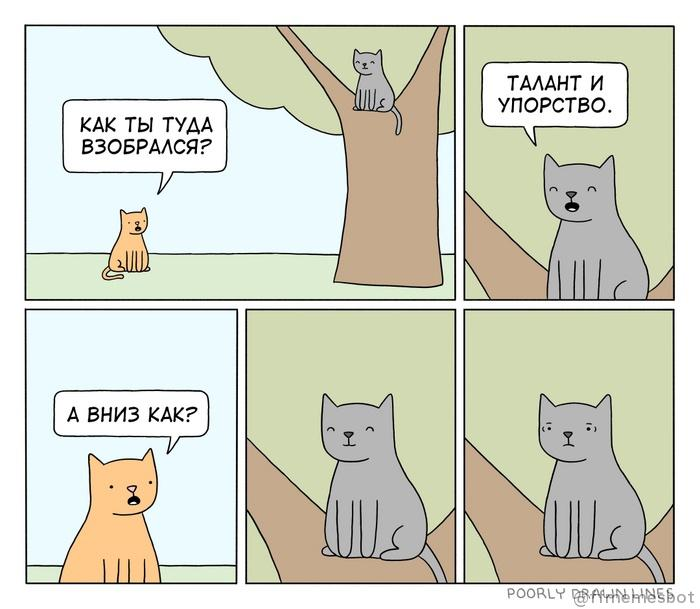

In [21]:
Image.open(join(path, fns[150]))

In [22]:
similar_ids = similars.similar(150)

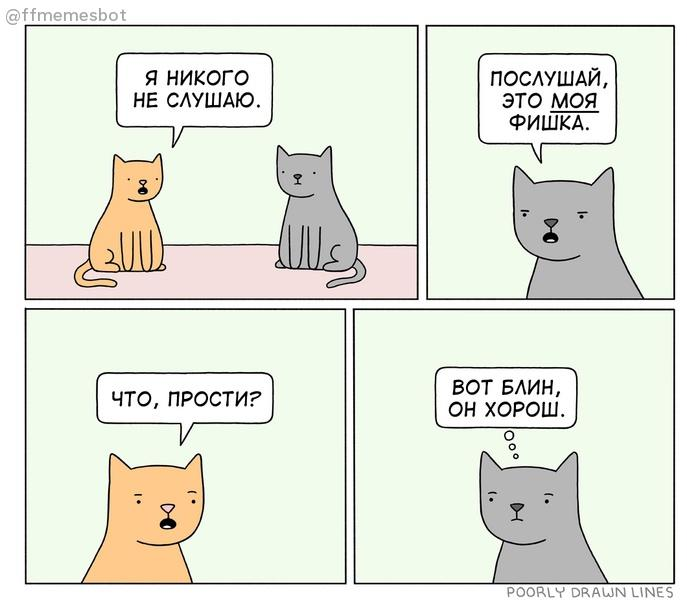

In [23]:
Image.open(join(path, fns[similar_ids[2]]))

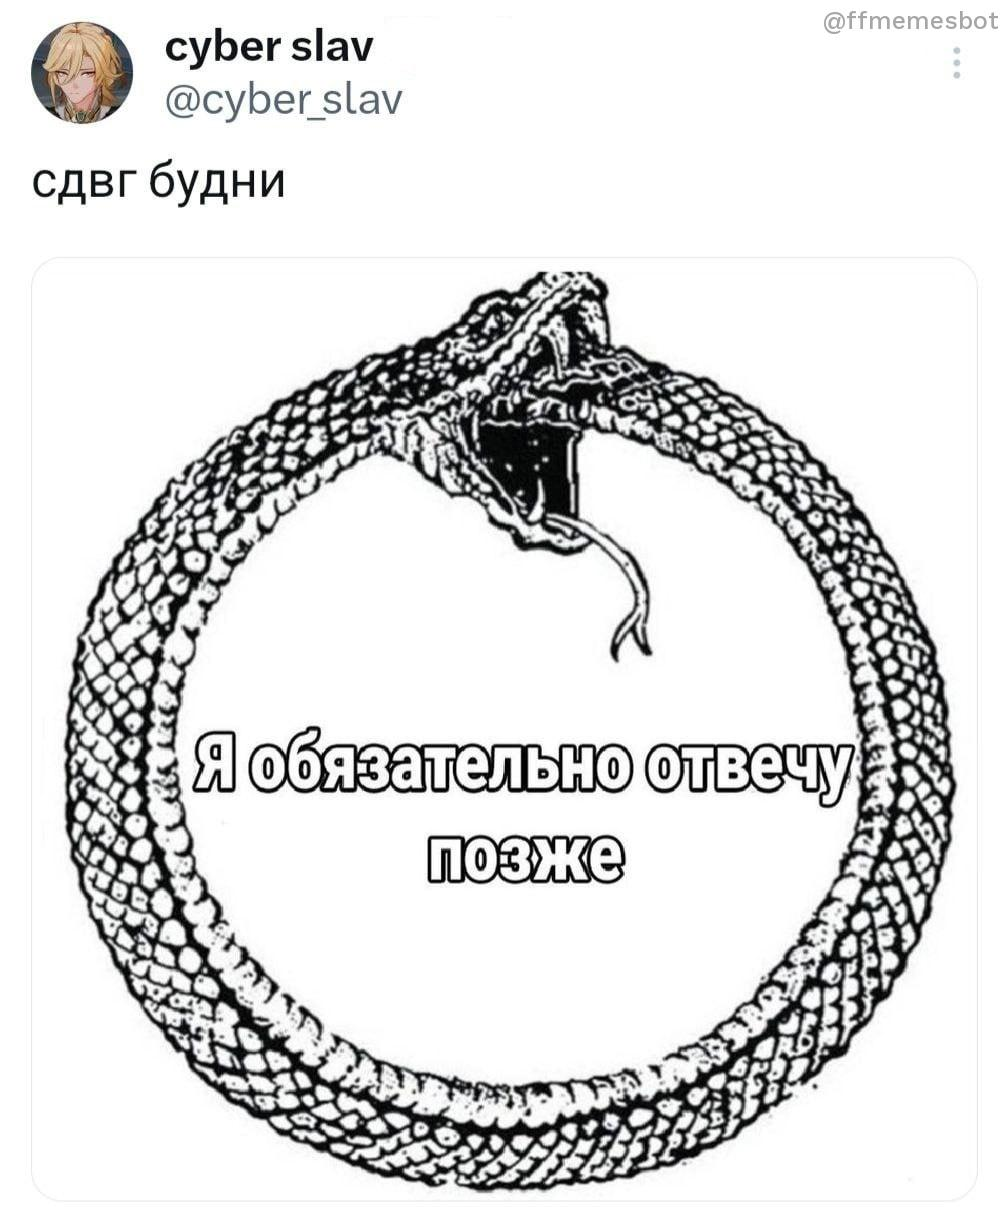

In [24]:
Image.open(join(path, fns[1000]))

In [25]:
similar_ids = similars.similar(1000)

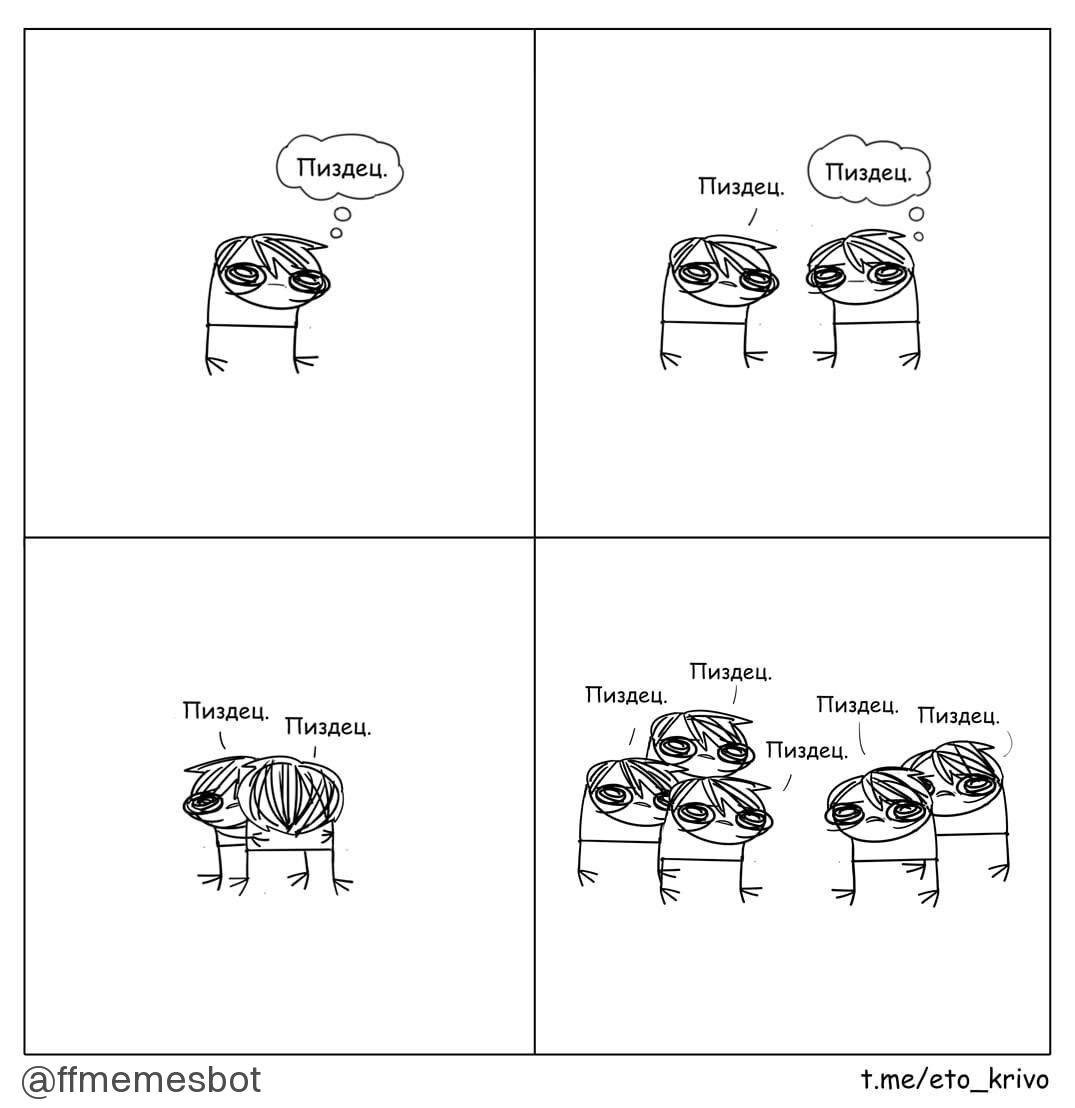

In [26]:
Image.open(join(path, fns[similar_ids[2]]))

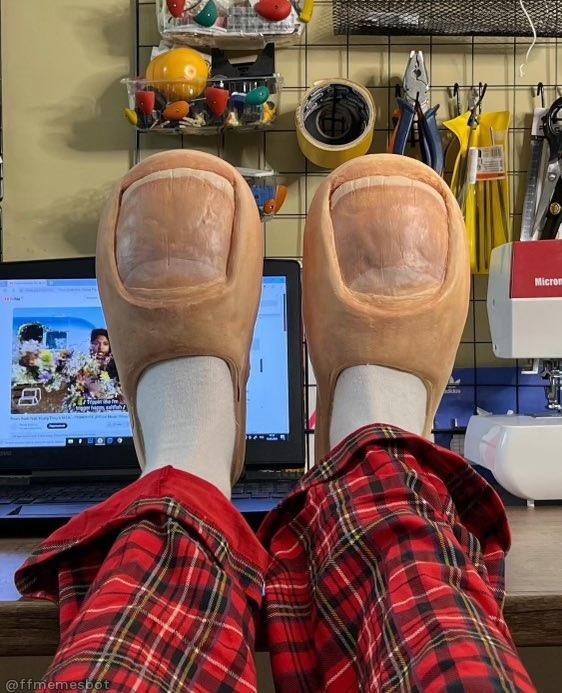

In [30]:
Image.open(join(path, fns[1800]))

In [32]:
similar_ids = similars.similar(1800)

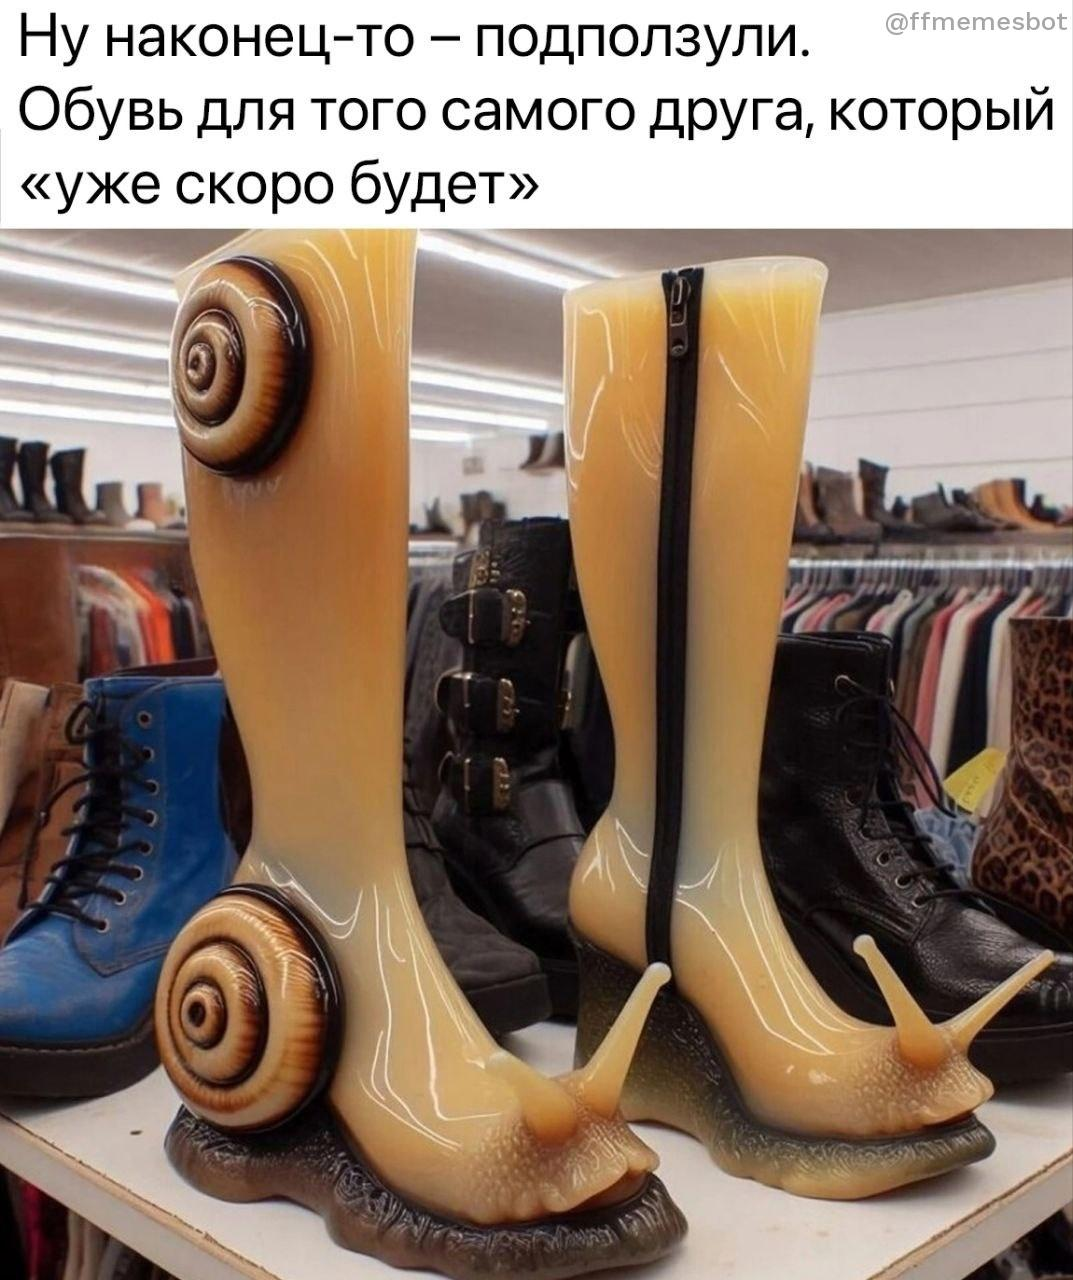

In [34]:
Image.open(join(path, fns[similar_ids[0]]))